<a href="https://colab.research.google.com/github/pankajsinghoec-08/d2l-en/blob/master/2_fashion_mnist_tf_Multiple_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###***ANN approach to Fashion MNIST Dataset using Tensorflow-2.0 & Keras Api***

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import seaborn as sns

In [11]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [12]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [13]:
print(tf.version.VERSION)
print(tf.keras.__version__)

2.3.0
2.4.0


***Import the Fashion MNIST dataset***


In [14]:
fmnist = tf.keras.datasets.fashion_mnist

In [15]:
(X_train_full, y_train_full), (X_test, y_test) = fmnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [16]:
# print the shape of each dataset
print(f'X_train_full: {X_train_full.shape}')
print(f'y_train_full: {y_train_full.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train_full: (60000, 28, 28)
y_train_full: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


In [17]:
#y_train_full = y_train_full.reshape(60000,1)
#y_test = y_test.reshape(10000,1)

In [18]:
print(y_train_full.shape)
print(y_test.shape)

(60000,)
(10000,)


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, we'll store them here to use later when plotting the 

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

***Preprocessing the data***

*The data must be preprocessed before thraining the network. Each image is of size 28x28 with pixel value in range of (0-255)*

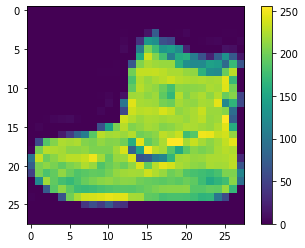

In [20]:
plt.figure()
plt.imshow(X_train_full[0])
plt.colorbar()
plt.grid(False)
plt.show()

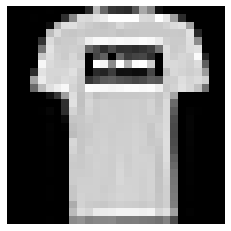

In [21]:
plt.imshow(X_train_full[1], cmap='gray')
plt.axis('off')
plt.show()

In [22]:
# Normalize the image pixel in the range of (0-1) by dividing the train & test set by 255
X_train = X_train_full/255
X_test = X_test/255

In [23]:
X_train[1].shape

(28, 28)

In [24]:
# X_train[1]

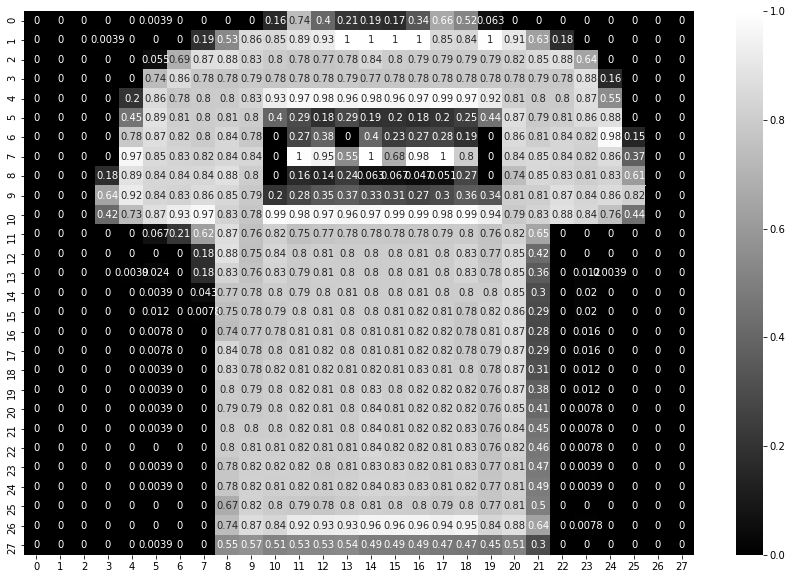

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train[1], annot=True, cmap='gray')
plt.show()

**To verify that the dataset is in the correct format and that we are ready to build the network, lets display the first 25 images from the training set and display the corresponding name below each image**

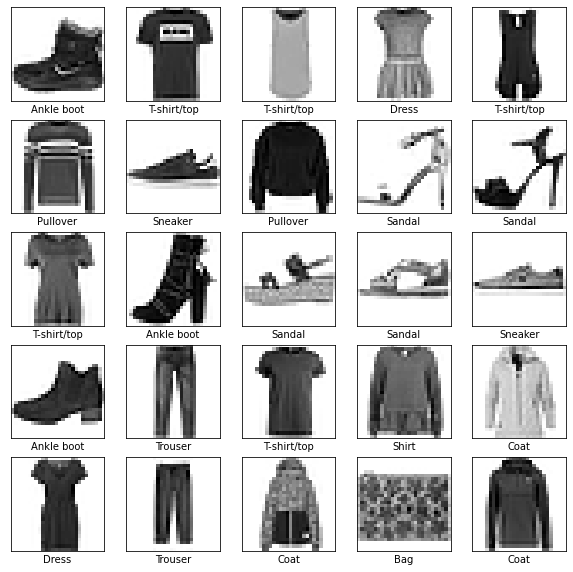

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()


### ***Model Build***

*Building the neural network requires configuring the layers of the model, then compiling the model.*

### ***Set up the layers***

*The basic building block of a neural network is the `layer`. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.*

*Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.*

In [27]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=[28,28], name='InputLayer'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(500, activation='relu', name='hiddenLayer1'),
                             #tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(250, activation='relu', name='hiddenLayer2'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(100, activation='relu', name='hiddenlayer3'),
                             #tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10, name='outputLayer')
                             ])

###***Model Compile***

In [28]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

###***Model Training***

In [29]:
model.fit(X_train, y_train_full, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5260 - accuracy: 0.8083
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4113 - accuracy: 0.8485
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3760 - accuracy: 0.8607
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3513 - accuracy: 0.8690
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3347 - accuracy: 0.8748
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3235 - accuracy: 0.8791
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3124 - accuracy: 0.8821
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.8869
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2955 - accuracy: 0.8901
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.289

###***Model Evaluation***

In [30]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'test accuracy: {test_accuracy}')

313/313 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8878
test accuracy: 0.8877999782562256


###***Making Predictions***

In [31]:
# With the trained model we can make predictions about some images. The model's linear outputs,
# logits. Attach a softmax layer to convert the logits to probabilities

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [32]:
prediction = probability_model.predict(X_test)

In [33]:
prediction[0].round(2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [34]:
y_pred = np.argmax(prediction[0], axis=-1)
y_pred

9

In [35]:
X_new = X_test[100:125]
y_probability = probability_model.predict(X_new)
len(X_new)

25

In [36]:
y_probability.round(2)

array([[0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.91, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.02, 0.  , 0.62, 0.01, 0.05, 0.  , 0.3 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.02, 0.  , 0.01, 0.  , 0.  , 0.  , 0.05, 0.  , 0.92, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.59, 0.  , 0.4 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.01, 0.  , 0.95, 0.  , 0.04, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.65, 0.  , 0.02, 0.01, 0.  , 0.  , 0.32, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.

In [37]:
y_pred = np.argmax(probability_model(X_new), axis=1)
len(y_pred)

25

In [38]:
y_test_new = y_test[100:125]

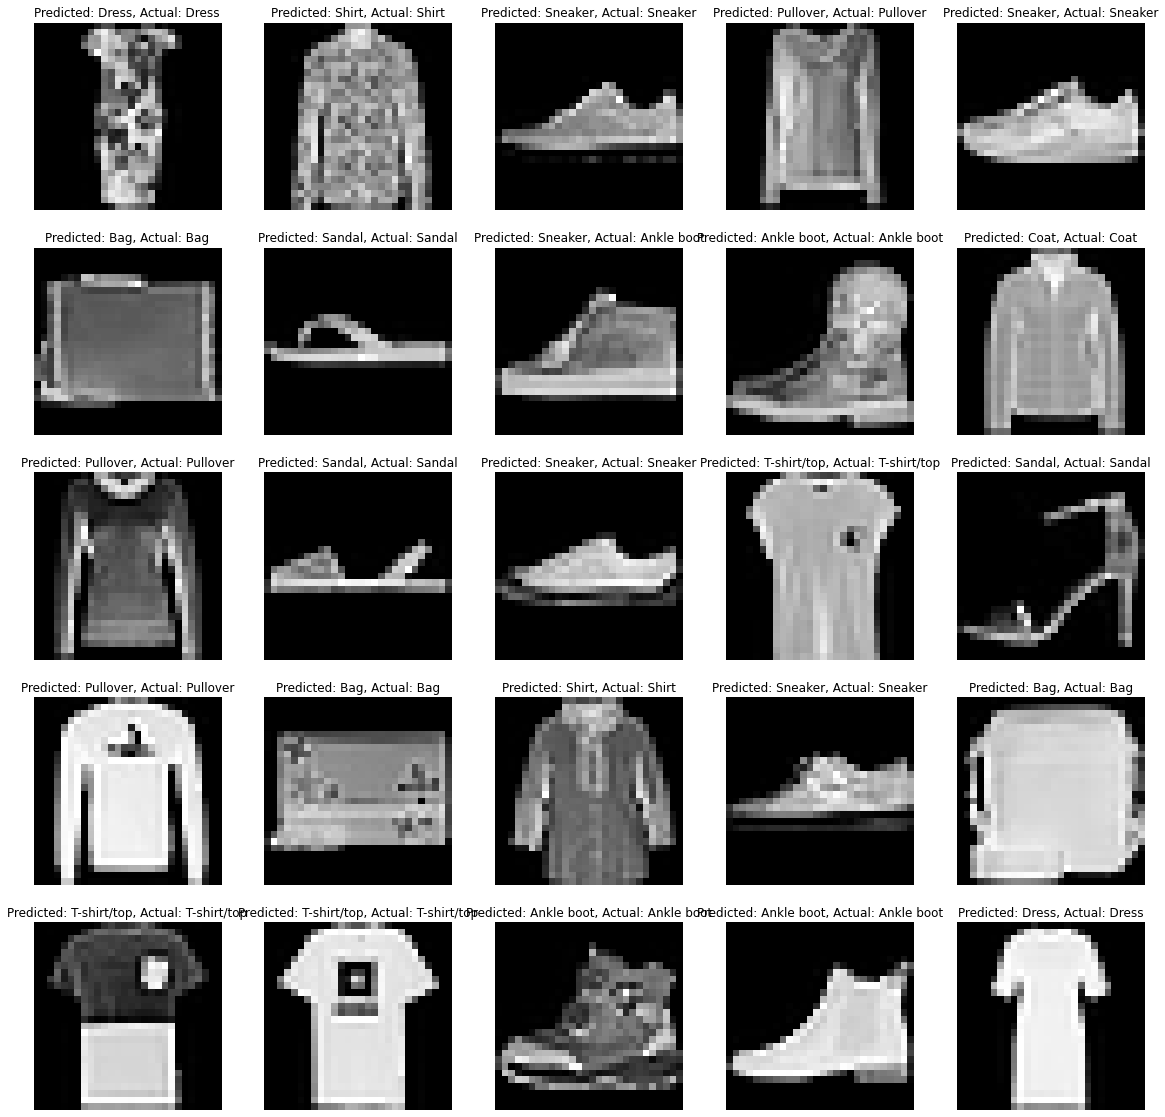

In [39]:
i = 1
plt.figure(figsize=(20,20))
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data, cmap='gray')
    plt.title(f'Predicted: {class_names[pred]}, Actual: {class_names[actual]}')
    plt.axis('off')
    i+=1
plt.show()

### ***Model Testing on New Data***

In [62]:
# Lets predict our model based on the original picture of a shirt
image_path = '/content/drive/MyDrive/iNeuron_DLCVNLP/Neural Network/ANN/'

In [67]:
image_list = ['Jacket.jpg', 'T-Shirt_1.jpg', 'Shirt_image.jpg', 'Shirt_image_1.jpg', 'T-Shirt.jpg']

In [68]:
# loading necessary libraries
import cv2
import matplotlib.image as mpimg

In [69]:
x = image_path + 'Jacket.jpg'
x

'/content/drive/MyDrive/iNeuron_DLCVNLP/Neural Network/ANN/Jacket.jpg'

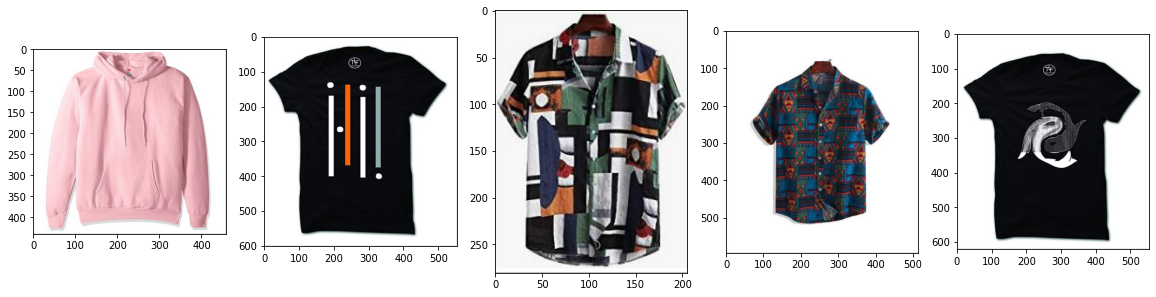

In [94]:
i = 1
plt.figure(figsize=(20,20))
for image in image_list:
    plt.subplot(1,5,i)
    x = image_path+image
    image = mpimg.imread(f"{x}")
    i+=1
    plt.axis()
    plt.imshow(image);

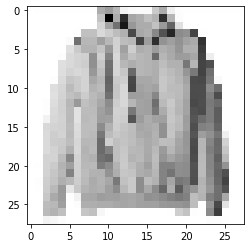

Bag 



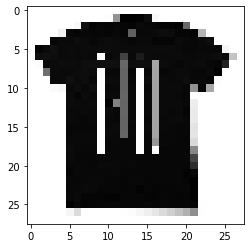

Sandal 



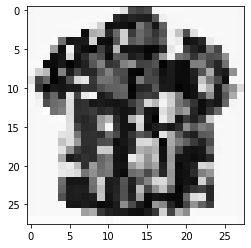

Sandal 



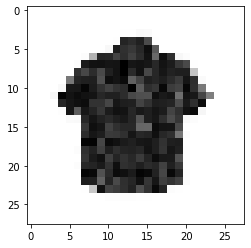

Bag 



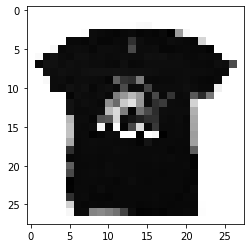

Sandal 



In [117]:
# Loading image
i=1
rgb_weights = [0.2989, 0.5870, 0.1140]
def rgb_2_gray(rgb_image):
    return np.dot(rgb_image[...,:3], rgb_weights)

#plt.figure(figsize=(15,15))
for image in image_list:
    #plt.subplot(1,5,i)
    x = image_path+image
    image = mpimg.imread(f"{x}")
    

    # Image resize and convert RGB format to gray scale
    im = cv2.resize(image, (28,28))
    
    # Convert the RGB image to gray_scale
    
    gray_img = rgb_2_gray(im)
    plt.imshow(gray_img, cmap=plt.get_cmap('gray'))
    plt.show();
    
    # Normalizing the image in the range of [0-1]
    gray_img = gray_img/255
    #gray_img.shape

    # Reshaping the image to (Ch, height, length)
    gray_img = gray_img.reshape(1, 28, 28)
    #gray_img.shape
    
    # Checking the prediction
    y_probability = np.argmax(probability_model.predict(gray_img))
    x =class_names[y_probability]
    print(x,'\n')
    #plt.title(x)
    i+=1
